# Day 3: Pandas Data Wrangling - Hands On

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Messy sample data
raw = pd.DataFrame({
    "date": ["2023-01-01","2023-01-02","2023-01-03","2023-01-03", None],
    "product": ["A","A","B","B","A"],
    "price": [10.0, 10.0, 20.0, np.nan, 10.0],
    "qty": [1, 2, 1, 3, None]
})
print("Raw:\n", raw)

Raw:
          date product  price  qty
0  2023-01-01       A   10.0  1.0
1  2023-01-02       A   10.0  2.0
2  2023-01-03       B   20.0  1.0
3  2023-01-03       B    NaN  3.0
4        None       A   10.0  NaN


In [6]:
# Clean
df = raw.copy()

In [7]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')

In [8]:
df["qty"] = df["qty"].fillna(0)
df["price"] = df["price"].fillna(df["price"].median())


In [9]:
# Features
df["revenue"] = df["price"] * df["qty"]


In [10]:
# Summaries
valid = df[df["date"].notna()].sort_values(["date","product"])
print("\nCleaned:\n", valid)


Cleaned:
         date product  price  qty  revenue
0 2023-01-01       A   10.0  1.0     10.0
1 2023-01-02       A   10.0  2.0     20.0
2 2023-01-03       B   20.0  1.0     20.0
3 2023-01-03       B   10.0  3.0     30.0


In [11]:
by_product = valid.groupby("product")["revenue"].agg(["sum","mean","count"])
print("\nRevenue by product:\n", by_product)


Revenue by product:
           sum  mean  count
product                   
A        30.0  15.0      2
B        50.0  25.0      2


In [12]:
# Pivot + plot
pivot = pd.pivot_table(valid, values="revenue", index="date", columns="product",
                       aggfunc="sum", fill_value=0)
print("\nPivot table:\n", pivot)


Pivot table:
 product        A     B
date                  
2023-01-01  10.0   0.0
2023-01-02  20.0   0.0
2023-01-03   0.0  50.0


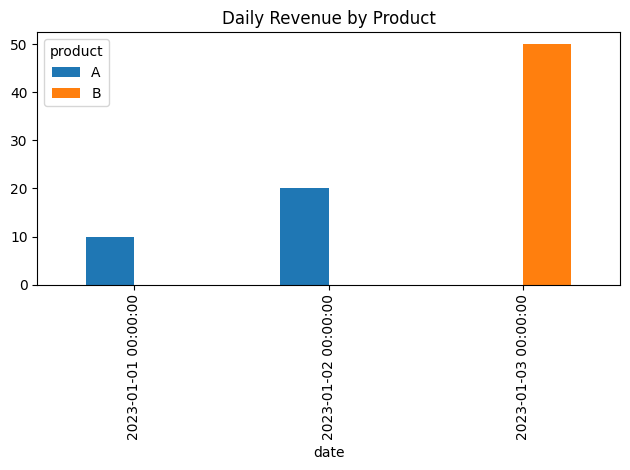

In [13]:
pivot.plot(kind="bar", title="Daily Revenue by Product")
plt.tight_layout()
plt.show()

In [14]:
# NumPy quick stats
arr = valid["revenue"].to_numpy()
print("Mean:", arr.mean(), "Std:", arr.std())

Mean: 20.0 Std: 7.0710678118654755
